In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt("Datos.csv", delimiter=',')

def regresion(x_array, y_array, order, n=100, min_point=0):
    """
        Returns: array of regresion values
    """
    coeff = np.polyfit(x_array, y_array, order)
    x = np.linspace(min_point, max(x_array)*1.1, n)
    y = np.zeros_like(x)
    for i in range(order+1):
        y += coeff[i]*x**(order-i)
    return x, y, coeff

def equation_text(coefficients, variable):
    """
        Returns: the equation of regresion as text
    """
    text = []
    
    i = len(coefficients)-1
    for (j, cons) in enumerate(coefficients):
        if j == i:
            text.append("$%.3f$"%cons)
        elif i-j == 1:
            text.append("$%.3f$"%(cons) + variable)
        else:            
            text.append("$%.3f$"%cons + variable+"$^%d$"%(i-j))
        
    final = ""
    for (i, element) in enumerate(text):
        if i != 0:
            if element[1] == "-":
                final += element
            else:
                final += "$+$"+element
        else:
            final += element
    
    return final

In [3]:
COMPOUND_NAME = 0
MOLECULAR_WEIGHT = 1
REAL_MASS = 2
MOL = 3
MASS_CHANGE = 4
MASS_CHANGE_MOL = 5
MOLAR_MAGNETIC_SUSCEPTIBILITY = 6
SPINS = 7

names = ["FeCl$_3$ · 6H$_2$O", "MnSO$_4$ · H$_2$O"
         , "Fe$_2$(SO$_4$)$_3$ · 9H$_2$O", "CoCl$_2$ · 6H$_2$O"
         , "KCr(SO$_4$)$_2$ · 12H$_2$O", 'NiSO$_4$ · 6H$_2$O'
         , "CuSO$_4$ · 5H$_2$O", "Fe$_4$[Fe(CN)$_6$]","(NH$_4$)$_2$Cr$_2$O$_7$", "CuCl"]

# Force vs N

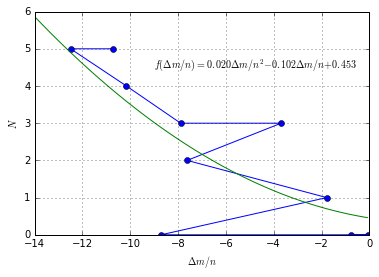

In [4]:
x, y, coeff = regresion(data[:, MASS_CHANGE_MOL], data[:, SPINS], 2, min_point=-14)
text = equation_text(coeff, "$\Delta m/n$")
plt.plot( data[:, MASS_CHANGE_MOL], data[:, SPINS], "-o")
plt.plot(x, y)
plt.text(-9, 4.5, "$f(\Delta m/n) = $" + text)
plt.xlabel("$\Delta m/n$")
plt.ylabel("$N$")
plt.grid()
plt.show()

In [5]:
def get_N(delta):
    return 0.020*delta**2-0.102*delta+0.453

# N vs force

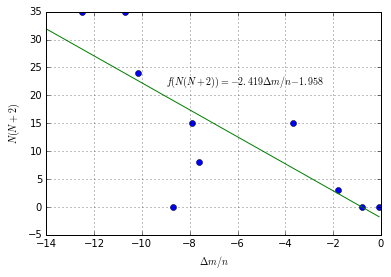

In [6]:
temp = data[:,SPINS]*(data[:,SPINS]+2)
x, y, coeff = regresion(data[:, MASS_CHANGE_MOL], temp, 1, min_point=-14)
text = equation_text(coeff, "$\Delta m/n$")
plt.plot(data[:, MASS_CHANGE_MOL], temp, "o")
plt.plot(x, y)
plt.text(-9, 22, "$f(N(N+2))=$"+text)
plt.xlabel("$\Delta m/n$")
plt.ylabel("$N(N+2)$")
plt.grid()
plt.savefig("Unpair_Mass.pdf")
plt.show()

# Susceptibility vs force

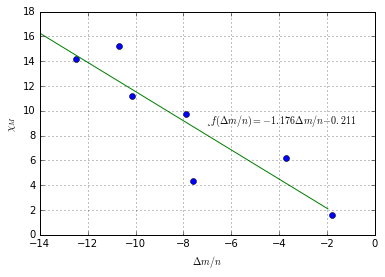

In [7]:
x, y, coeff = regresion(data[:-3,MASS_CHANGE_MOL], data[:-3,MOLAR_MAGNETIC_SUSCEPTIBILITY], 1, min_point=-14)
text = equation_text(coeff, "$\Delta m/n$")
plt.plot(data[:-3,MASS_CHANGE_MOL], data[:-3,MOLAR_MAGNETIC_SUSCEPTIBILITY], "o")
plt.plot(x, y, "-")
plt.text(-7, 9, "$̧f(\Delta m/n)=$"+text)
plt.ylabel("$\chi_M$")
plt.xlabel("$\Delta m/n$")
plt.grid()
plt.savefig("Susceptibility_mass.pdf")
#plt.legend()
plt.show()

In [8]:
def get_chi(delta):
    return -1.176*delta-0.211

In [9]:
(a, b), cov = np.polyfit(data[:-3,MASS_CHANGE_MOL], data[:-3,MOLAR_MAGNETIC_SUSCEPTIBILITY], 1, cov=True)
np.sqrt(np.diag(cov))

array([ 0.35245919,  3.01134238])

In [10]:
for i in range(len(names)):
    print(names[i], "&", "%.3f"%data[i, MASS_CHANGE_MOL], "&" ,
          "%.3f"%data[i, MOLAR_MAGNETIC_SUSCEPTIBILITY], "&", data[i, SPINS], r"\\")

FeCl$_3$ · 6H$_2$O & -10.704 & 15.250 & 5.0 \\
MnSO$_4$ · H$_2$O & -12.494 & 14.200 & 5.0 \\
Fe$_2$(SO$_4$)$_3$ · 9H$_2$O & -10.158 & 11.200 & 4.0 \\
CoCl$_2$ · 6H$_2$O & -7.890 & 9.710 & 3.0 \\
KCr(SO$_4$)$_2$ · 12H$_2$O & -3.691 & 6.200 & 3.0 \\
NiSO$_4$ · 6H$_2$O & -7.620 & 4.300 & 2.0 \\
CuSO$_4$ · 5H$_2$O & -1.783 & 1.570 & 1.0 \\
Fe$_4$[Fe(CN)$_6$] & -8.710 & -172.000 & 0.0 \\
(NH$_4$)$_2$Cr$_2$O$_7$ & -0.075 & 38.000 & 0.0 \\
CuCl & -0.787 & -40.000 & 0.0 \\


In [11]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

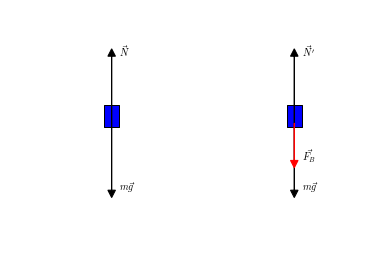

In [12]:
f, axes = plt.subplots(1,2)

for (i, ax) in enumerate(axes):
    ax.arrow(0, 0, 0, 0.9, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 0, -0.9, head_width=0.05, head_length=0.1, fc='k', ec='k')
    if i != 0:
        ax.arrow(0, 0, 0, -0.5, head_width=0.05, head_length=0.1, fc='r', ec='r')
        ax.text(0.05, -0.5, r"$\vec{F_B}$")
        ax.text(0.05, 0.9, r"$\vec{N'}$")
        
    else:
        ax.text(0.05, 0.9, r"$\vec{N}$")
        
    ax.text(0.05, -0.9, r"$m\vec{g}$")
    
    
    rect = mpatches.Rectangle([-0.1/2,-0.1/2], 0.1, 0.3)
    collection = PatchCollection([rect])
    ax.add_collection(collection)
    
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
plt.savefig("free_body.pdf")
plt.show()

In [13]:
results = [-0.0081/0.0035, -0.843]
for result in results:
    print("Para m/n = %.3f se tienen %.2f electrones y susceptibilidad %.3f"%(result,get_N(result), get_chi(result)))

Para m/n = -2.314 se tienen 0.80 electrones y susceptibilidad 2.511
Para m/n = -0.843 se tienen 0.55 electrones y susceptibilidad 0.780
